In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import scipy

In [4]:
data = pd.read_csv("student-mat.csv", sep = ";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
data.shape

(395, 33)

In [6]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

395 students and 33 features.

In [7]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No missing values.

In [9]:
data["G3"].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

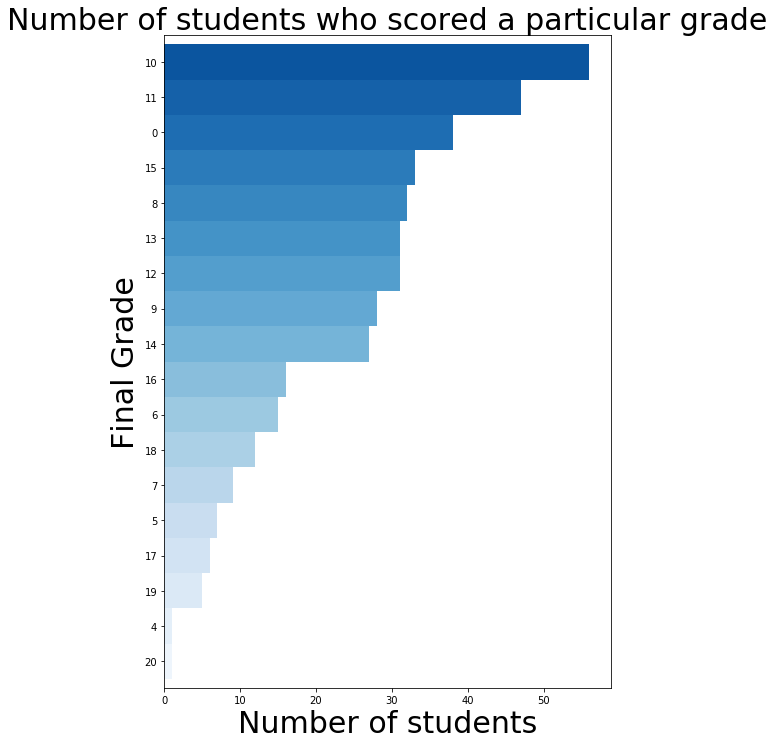

In [10]:
plt.subplots(figsize = (8, 12))
grade_counts = data["G3"].value_counts().sort_values().plot.barh(width = 1, color = sns.color_palette("Blues", 20))
grade_counts.axes.set_title("Number of students who scored a particular grade", fontsize = 30)
grade_counts.set_xlabel("Number of students", fontsize = 30)
grade_counts.set_ylabel("Final Grade", fontsize = 30)
plt.show()

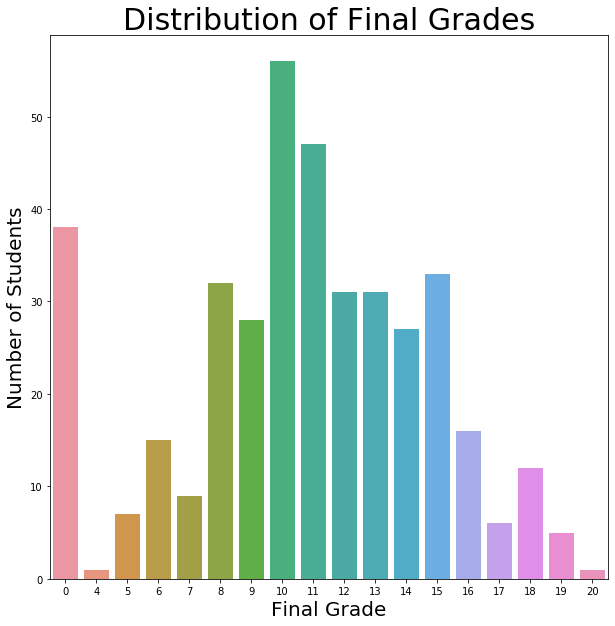

In [11]:
plt.subplots(figsize = (10, 10))
t = sns.countplot(data["G3"])
t.axes.set_title("Distribution of Final Grades", fontsize = 30)
t.set_xlabel("Final Grade", fontsize = 20)
t.set_ylabel("Number of Students", fontsize = 20)
plt.show()

In [12]:
m_students = len(data[data["sex"] == "M"])
f_students = len(data[data["sex"] == "F"])
print("Number of male students : ", m_students)
print("Number of female students : ", f_students)

Number of male students :  187
Number of female students :  208


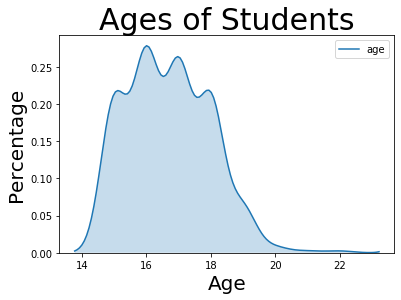

In [13]:
b = sns.kdeplot(data["age"], shade = True)
b.axes.set_title("Ages of Students", fontsize = 30)
b.set_xlabel("Age", fontsize = 20)
b.set_ylabel("Percentage", fontsize = 20)
plt.show()

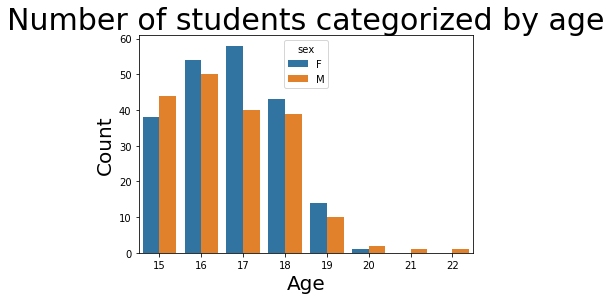

In [14]:
b = sns.countplot("age", hue = "sex", data = data)
b.axes.set_title("Number of students categorized by age", fontsize = 30)
b.set_xlabel("Age", fontsize = 20)
b.set_ylabel("Count", fontsize = 20)
plt.show()

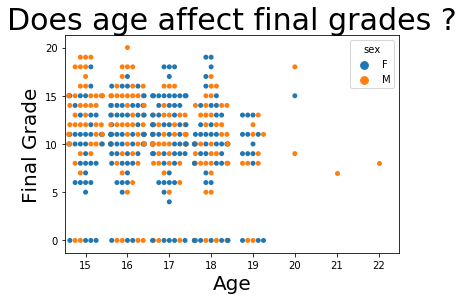

In [15]:
b = sns.swarmplot(x = "age", y = "G3", hue = "sex", data = data)
b.axes.set_title("Does age affect final grades ?", fontsize = 30)
b.set_xlabel("Age", fontsize = 20)
b.set_ylabel("Final Grade", fontsize = 20)
plt.show()

Count of students from urban and rural areas

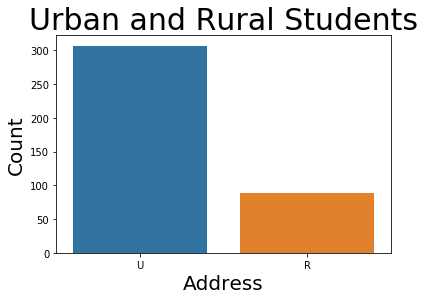

In [16]:
b = sns.countplot(data["address"])
b.axes.set_title("Urban and Rural Students", fontsize = 30)
b.set_xlabel("Address", fontsize = 20)
b.set_ylabel("Count", fontsize = 20)
plt.show()

Most students are from urban areas, but do urban students perform better than rural students ?

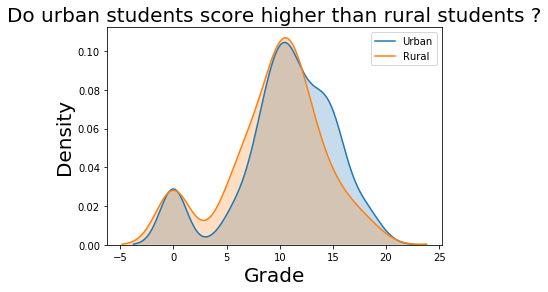

In [17]:
# .loc = Access a group of rows and columns by label(s) or a boolean array.
sns.kdeplot(data.loc[data["address"] == "U", "G3"], label = "Urban", shade = True)
sns.kdeplot(data.loc[data["address"] == "R", "G3"], label = "Rural", shade = True)
plt.title("Do urban students score higher than rural students ?", fontsize = 20)
plt.xlabel("Grade", fontsize = 20)
plt.ylabel("Density", fontsize = 20)
plt.show()

### This graph shows us that there is not much difference between the scores based on adresses.

# CORRELATION (Between various features and the final grade)

In [18]:
data.corr()["G3"].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

This correlation is only between numerical values.

                                      ENCODING CATEGORICAL VALUES
                                        
LABEL ENCODING : This method involves assigning one label for each category.
    The problem with label encoding is that the assignment of integers is random and changes every time we run 
    the function. Also the model might give higher priority to larger labels. 
    !! LABEL ENCODING CAN BE USED WHEN WE HAVE ONLY 2 UNIQUE VALUES
    
ONE HOT ENCODING : The problem with label encoding is solved by one hot encoding. 
    It creates a new column for each category and uses only binary values. 
    The downside of one hot encoding is that the number of features can explode if the categorical variables have many categories. 
    To deal with this we can perform PCA (or other dimensionality reduction methods) followed by one hot encoding.

Example of one hot encoding

In [19]:
# Select only categorical variables
category_df = data.select_dtypes(include = ["object"])

# one hot encode the variables
dummy_df = pd.get_dummies(category_df)
# The get_dummies() function is used to convert categorical variable into dummy/indicator variables.

# Put the grade back in the dataframe
dummy_df["G3"] = data["G3"]

#Find correlations with grade
dummy_df.corr()["G3"].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

I'll apply one hot encoding to the dataset and find correlation again.
   
   Although G1 and G2 which are period grades of a student and are highly correlated to the final grade G3, i'll drop them. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful because we want to find other factors affect the grade.

In [20]:
# Selecting the most correlated values and dropping the others.
labels = data["G3"]

# Drop the school and grade columns.
data = data.drop(["school", "G1", "G2"],  axis = "columns")

# One-Hot Encoding of categorical variables
data = pd.get_dummies(data)

In [21]:
# Find correlations with Grade
most_correlated = data.corr().abs()["G3"].sort_values(ascending = False)
# .abs = Return a Series/DataFrame with absolute numeric value(mutlak değer) of each element.
#         This function only applies to elements that are all numeric.

# Maintain the top 8 most correlation features with Grade

most_correlated = most_correlated[: 9]
most_correlated

G3             1.000000
failures       0.360415
Medu           0.217147
higher_yes     0.182465
higher_no      0.182465
age            0.161579
Fedu           0.152457
goout          0.132791
romantic_no    0.129970
Name: G3, dtype: float64

In [22]:
data = data.loc[:, most_correlated.index]
data.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
0,6,0,4,1,0,18,4,4,1
1,6,0,1,1,0,17,1,3,1
2,10,3,1,1,0,15,1,2,1
3,15,0,4,1,0,15,2,2,0
4,10,0,3,1,0,16,3,2,1


## Now we will analyse these variables and then train a model

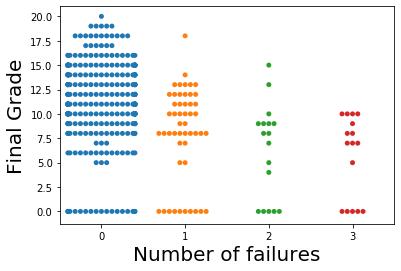

In [23]:
b = sns.swarmplot(x = data["failures"], y = data["G3"])
b.set_xlabel("Number of failures", fontsize = 20)
b.set_ylabel("Final Grade", fontsize = 20)
plt.show()

# We can say that the students with less previous failures usually scores higher.

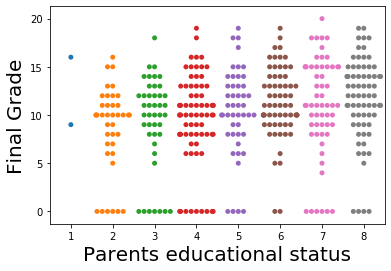

In [24]:
family_ed = data["Fedu"] + data["Medu"]
b = sns.swarmplot(x = family_ed, y = data["G3"])
b.set_xlabel("Parents educational status", fontsize = 20)
b.set_ylabel("Final Grade", fontsize = 20)
plt.show()

# Educated families scores higher.

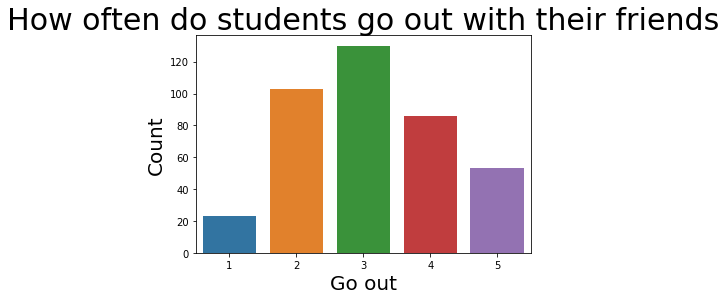

In [25]:
b = sns.countplot(data["goout"])
b.axes.set_title("How often do students go out with their friends", fontsize = 30)
b.set_xlabel("Go out", fontsize = 20)
b.set_ylabel("Count", fontsize = 20)
plt.show()

# Most students have an average score when it comes to going out with friends. (normal distribution)

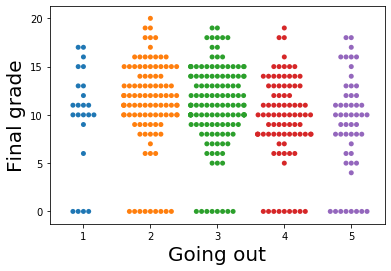

In [26]:
b = sns.swarmplot(x = data["goout"], y = data["G3"])
b.set_xlabel("Going out", fontsize = 20)
b.set_ylabel("Final grade", fontsize = 20)
plt.show()

# Students who goes out a lot, scores less.

### Does having a romantic relationship affect grade?
- romantic_no = 1 means NO romantic relationship
- romantic_no = 0 means romantic relationship

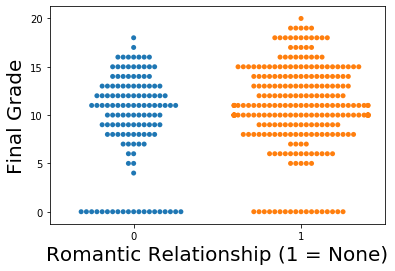

In [27]:
b = sns.swarmplot(x = data["romantic_no"], y = data["G3"])
b.set_xlabel("Romantic Relationship (1 = None)", fontsize = 20)
b.set_ylabel("Final Grade", fontsize = 20)
plt.show()

## Students with no romantic relationship scores higher.

 #                                               MODELING

In [28]:
# Splitting the data into training and testing data (70% and 30%)
# We mention the random_state=42 to achieve the same split everytime we run the code

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.30, random_state = 42)

In [29]:
X_train.head()

,G3,failures,Medu,higher_yes,higher_no,age,Fedu,goout,romantic_no
17,10,0,3,1,0,16,3,2,1
165,12,1,3,0,1,16,2,2,1
24,8,0,2,1,0,15,4,2,1
126,11,0,3,1,0,15,4,2,0
346,16,0,4,1,0,18,3,2,0


## Calculate Mean Absolute Error (mae) and Root Mean Square Error (rmse)

In [30]:
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

### Naive baseline is the median prediction

In [31]:
# Find the median
median_pred = X_train["G3"].median()

# Create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# Store the true G3 values for passing into the function
true = X_test["G3"]

In [32]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print("Median Baseline MAE: {:.3f}".format(mb_mae))
print("Median Baseline RMSE: {:.3f}".format(mb_rmse))

Median Baseline MAE: 3.723
Median Baseline RMSE: 4.738


In [33]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    model_name_list = ["Linear Regression", "ElasticNet Regression", "Random Forest",
                       "Extra Trees", "SVM", "Gradient Boosted", "Baseline"]
    X_train = X_train.drop("G3", axis = "columns")
    X_test = X_test.drop("G3", axis = "columns")
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
    model3 = RandomForestRegressor(n_estimators = 100)
    model4 = ExtraTreesRegressor(n_estimators = 100)
    model5 = SVR(kernel = "rbf", degree = 3, C = 1.0, gamma = "auto")
    model6 = GradientBoostingRegressor(n_estimators = 50)
    
    # Dataframe for results
    results = pd.DataFrame(columns = ["mae", "rmse"], index = model_name_list)
    
    # Train and predict with each model
    #enumerate() method : The enumerate() method adds counter to an iterable and returns it (the enumerate object).
    #The syntax of enumerate() is: enumerate(iterable, start=0)
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
    
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test)**2))

        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
        
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test)**2))
    
    results.loc["Baseline", :] = [baseline_mae, baseline_rmse]
    
    return results

In [36]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,3.42734,4.39019
ElasticNet Regression,3.49712,4.48324
Random Forest,3.74876,4.77284
Extra Trees,3.97637,5.07555
SVM,3.46428,4.49123
Gradient Boosted,3.53621,4.4289
Baseline,3.72269,4.73766


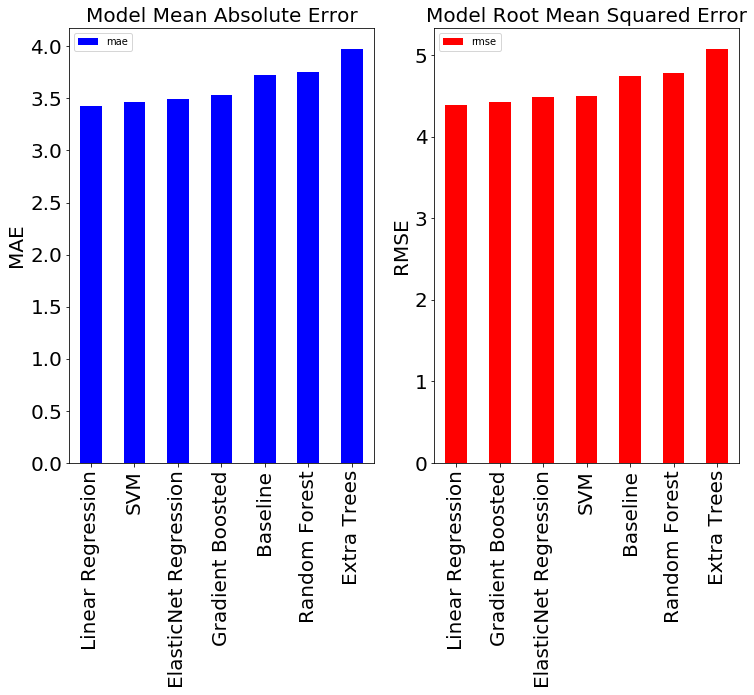

In [38]:
plt.figure(figsize = (12, 8))

# Root mean squared error
ax = plt.subplot(1, 2, 1)
results.sort_values("mae", ascending = True).plot.bar(y = "mae", color = "b", ax = ax, fontsize = 20)
plt.title("Model Mean Absolute Error", fontsize = 20)
plt.ylabel("MAE", fontsize = 20)

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values("rmse", ascending =True).plot.bar(y = "rmse", color = "r", ax = ax, fontsize = 20)
plt.title("Model Root Mean Squared Error", fontsize = 20)
plt.ylabel("RMSE", fontsize = 20)

plt.show()

# We see that linear regression is performing the best in both cases